In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [107]:
df_smae = pd.read_csv("smae.csv")

In [108]:
df_smae.head()

,Unnamed: 0,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,0,1,25,Female,Instagram,120.0,3.0,45.0,10.0,12.0,Happiness
1,1,2,30,Male,Twitter,90.0,5.0,20.0,25.0,30.0,Anger
2,2,3,22,Non-binary,Facebook,60.0,2.0,15.0,5.0,20.0,Neutral
3,3,4,28,Female,Instagram,200.0,8.0,100.0,30.0,50.0,Anxiety
4,4,5,33,Male,LinkedIn,45.0,1.0,5.0,2.0,10.0,Boredom


In [109]:
df_smae.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1249 entries, 0 to 1248
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  1249 non-null   int64  
 1   User_ID                     1249 non-null   object 
 2   Age                         1249 non-null   object 
 3   Gender                      1248 non-null   object 
 4   Platform                    1248 non-null   object 
 5   Daily_Usage_Time (minutes)  1248 non-null   float64
 6   Posts_Per_Day               1248 non-null   float64
 7   Likes_Received_Per_Day      1248 non-null   float64
 8   Comments_Received_Per_Day   1248 non-null   float64
 9   Messages_Sent_Per_Day       1248 non-null   object 
 10  Dominant_Emotion            1247 non-null   object 
dtypes: float64(4), int64(1), object(6)
memory usage: 107.5+ KB


In [110]:
# I want to look at data where no information on dominant emotions exist.
MASK_NONEXISTENT_EMOTIONS = df_smae["Dominant_Emotion"].isnull()
df_smae[MASK_NONEXISTENT_EMOTIONS]

,Unnamed: 0,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
641,641,Tabii,işte mevcut veri kümesini 1000 satıra tamamlı...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1195,91,27,Non-binary,Facebook,55,1.0,9.0,2.0,11.0,Anxiety,NaN


In [111]:
df_smae[df_smae.isnull()]

,Unnamed: 0,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1244,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1245,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1246,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1247,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [112]:
df_smae.dropna(inplace=True)

In [113]:
df_smae.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1247 entries, 0 to 1248
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  1247 non-null   int64  
 1   User_ID                     1247 non-null   object 
 2   Age                         1247 non-null   object 
 3   Gender                      1247 non-null   object 
 4   Platform                    1247 non-null   object 
 5   Daily_Usage_Time (minutes)  1247 non-null   float64
 6   Posts_Per_Day               1247 non-null   float64
 7   Likes_Received_Per_Day      1247 non-null   float64
 8   Comments_Received_Per_Day   1247 non-null   float64
 9   Messages_Sent_Per_Day       1247 non-null   object 
 10  Dominant_Emotion            1247 non-null   object 
dtypes: float64(4), int64(1), object(6)
memory usage: 116.9+ KB


In [114]:
df_smae["Age"].unique()

array(['25', '30', '22', '28', '33', '21', '27', '24', '29', '31', '23',
       '26', '34', '35', '32', 'Male', 'Female', 'Non-binary'],
      dtype=object)

In [115]:
df_smae["Gender"].unique()

array(['Female', 'Male', 'Non-binary', '27', '24', '29', '33', '31', '22',
       '25', '28', '30', '23', '34', '26', '35', '21', '32', 'Marie'],
      dtype=object)

In [116]:
# I want to look at the proportion of affected age values.

BAD_AGE_VALUES = ["Male", "Female", "Non-binary"]

MASK_BAD_AGES = df_smae["Age"].isin(BAD_AGE_VALUES)

df_smae[MASK_BAD_AGES]

,Unnamed: 0,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
250,250,251,Male,27,Instagram,165.0,6.0,85.0,30.0,28.0,Happiness
251,251,252,Female,24,Twitter,75.0,3.0,33.0,18.0,19.0,Anger
252,252,253,Non-binary,29,Facebook,85.0,2.0,27.0,9.0,20.0,Neutral
253,253,254,Female,33,Instagram,145.0,4.0,65.0,23.0,35.0,Sadness
254,254,255,Male,31,LinkedIn,60.0,1.0,15.0,7.0,17.0,Anxiety
...,...,...,...,...,...,...,...,...,...,...,...
1174,70,613,Female,22,LinkedIn,90.0,10.0,12.0,5.0,11,Neutral
1179,75,524,Female,26,Instagram,90.0,3.0,39.0,10.0,21,Neutral
1180,76,105,Male,33,LinkedIn,30.0,1.0,10.0,9.0,14,Boredom
1181,77,622,Female,24,Twitter,85.0,6.0,42.0,15.0,21,Boredom


In [117]:
df_smae = df_smae[df_smae["Gender"] != "Marie"]

In [118]:
df_smae["Gender"].unique()

array(['Female', 'Male', 'Non-binary', '27', '24', '29', '33', '31', '22',
       '25', '28', '30', '23', '34', '26', '35', '21', '32'], dtype=object)

In [119]:
# I want to look at the proportion of affected age values.

BAD_GENDER_VALUES = ['27', '24', '29', '33', '31', '22', '25', '28', '30', '23', '34', '26', '35', '21', '32']

MASK_BAD_GENDERS = df_smae["Gender"].isin(BAD_GENDER_VALUES)

df_smae[MASK_BAD_GENDERS]

,Unnamed: 0,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
250,250,251,Male,27,Instagram,165.0,6.0,85.0,30.0,28.0,Happiness
251,251,252,Female,24,Twitter,75.0,3.0,33.0,18.0,19.0,Anger
252,252,253,Non-binary,29,Facebook,85.0,2.0,27.0,9.0,20.0,Neutral
253,253,254,Female,33,Instagram,145.0,4.0,65.0,23.0,35.0,Sadness
254,254,255,Male,31,LinkedIn,60.0,1.0,15.0,7.0,17.0,Anxiety
...,...,...,...,...,...,...,...,...,...,...,...
1174,70,613,Female,22,LinkedIn,90.0,10.0,12.0,5.0,11,Neutral
1179,75,524,Female,26,Instagram,90.0,3.0,39.0,10.0,21,Neutral
1180,76,105,Male,33,LinkedIn,30.0,1.0,10.0,9.0,14,Boredom
1181,77,622,Female,24,Twitter,85.0,6.0,42.0,15.0,21,Boredom


In [120]:
df_smae_swapped_values = df_smae[MASK_BAD_GENDERS]
df_smae_correct_values = df_smae[~MASK_BAD_GENDERS]

In [121]:
df_smae_swapped_values.head(3)

,Unnamed: 0,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
250,250,251,Male,27,Instagram,165.0,6.0,85.0,30.0,28.0,Happiness
251,251,252,Female,24,Twitter,75.0,3.0,33.0,18.0,19.0,Anger
252,252,253,Non-binary,29,Facebook,85.0,2.0,27.0,9.0,20.0,Neutral


In [122]:
df_smae_correct_values.head(3)

,Unnamed: 0,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,0,1,25,Female,Instagram,120.0,3.0,45.0,10.0,12.0,Happiness
1,1,2,30,Male,Twitter,90.0,5.0,20.0,25.0,30.0,Anger
2,2,3,22,Non-binary,Facebook,60.0,2.0,15.0,5.0,20.0,Neutral


In [192]:
assert len(df_smae_swapped_values) + len(df_smae_correct_values) == len(df_smae)

In [207]:
df_smae_swapped_values

,Unnamed: 0,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
250,250,251,Male,27,Instagram,165.0,6.0,85.0,30.0,28.0,Happiness
251,251,252,Female,24,Twitter,75.0,3.0,33.0,18.0,19.0,Anger
252,252,253,Non-binary,29,Facebook,85.0,2.0,27.0,9.0,20.0,Neutral
253,253,254,Female,33,Instagram,145.0,4.0,65.0,23.0,35.0,Sadness
254,254,255,Male,31,LinkedIn,60.0,1.0,15.0,7.0,17.0,Anxiety
...,...,...,...,...,...,...,...,...,...,...,...
1174,70,613,Female,22,LinkedIn,90.0,10.0,12.0,5.0,11,Neutral
1179,75,524,Female,26,Instagram,90.0,3.0,39.0,10.0,21,Neutral
1180,76,105,Male,33,LinkedIn,30.0,1.0,10.0,9.0,14,Boredom
1181,77,622,Female,24,Twitter,85.0,6.0,42.0,15.0,21,Boredom


In [206]:
df_smae_swapped_values[["Age", "Gender"]] = df_smae_swapped_values[["Gender", "Age"]]

In [208]:
df_smae_swapped_values.columns

Index(['Unnamed: 0', 'User_ID', 'Age', 'Gender', 'Platform',
       'Daily_Usage_Time (minutes)', 'Posts_Per_Day', 'Likes_Received_Per_Day',
       'Comments_Received_Per_Day', 'Messages_Sent_Per_Day',
       'Dominant_Emotion'],
      dtype='object')

In [125]:
df_smae = pd.concat([df_smae_correct_values, df_smae_swapped_values])

In [211]:
df_smae["Gender"].unique()

array(['Female', 'Male', 'Non-binary'], dtype=object)

In [214]:
try:
    df_smae.drop(columns=["Unnamed: 0"], inplace=True)
except:
    print("Column `Unnamed: 0` does not exist and may have already been dropped.")

Column `Unnamed: 0` does not exist and may have already been dropped.
1


In [216]:
df_smae.head()

,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,1,25,Female,Instagram,120.0,3,45,10,12,Happiness
1,2,30,Male,Twitter,90.0,5,20,25,30,Anger
2,3,22,Non-binary,Facebook,60.0,2,15,5,20,Neutral
3,4,28,Female,Instagram,200.0,8,100,30,50,Anxiety
4,5,33,Male,LinkedIn,45.0,1,5,2,10,Boredom


### What's the proportions of dominant emotions in our dataset?

In [89]:
df_smae["Dominant_Emotion"].value_counts(normalize=True)

Dominant_Emotion
Neutral      0.206260
Happiness    0.193419
Anxiety      0.178973
Sadness      0.159711
Boredom      0.139647
Anger        0.121188
Agression    0.000803
Name: proportion, dtype: float64

<Axes: xlabel='Dominant_Emotion', ylabel='Count'>

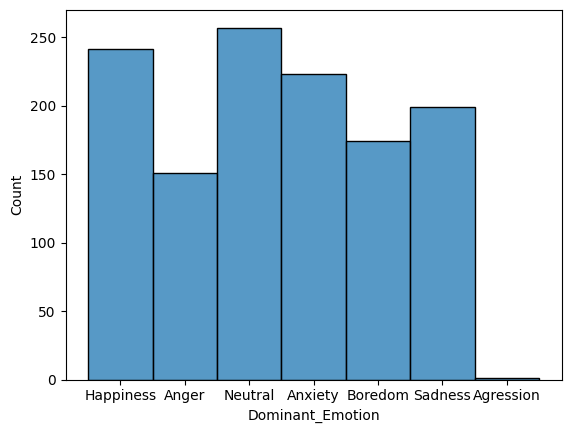

In [90]:
sns.histplot(data=df_smae["Dominant_Emotion"])

In [132]:
df_smae["Dominant_Emotion"].unique()

array(['Happiness', 'Anger', 'Neutral', 'Anxiety', 'Boredom', 'Sadness',
       'Agression'], dtype=object)

In [133]:
df_smae["Dominant_Emotion"] = df_smae["Dominant_Emotion"].replace(["Agression"], ["Anger"])

In [134]:
df_smae["Dominant_Emotion"].unique()

array(['Happiness', 'Anger', 'Neutral', 'Anxiety', 'Boredom', 'Sadness'],
      dtype=object)

In [135]:
df_smae["Dominant_Emotion"].value_counts(normalize=True)

Dominant_Emotion
Neutral      0.206260
Happiness    0.193419
Anxiety      0.178973
Sadness      0.159711
Boredom      0.139647
Anger        0.121990
Name: proportion, dtype: float64

<Axes: xlabel='Dominant_Emotion', ylabel='Count'>

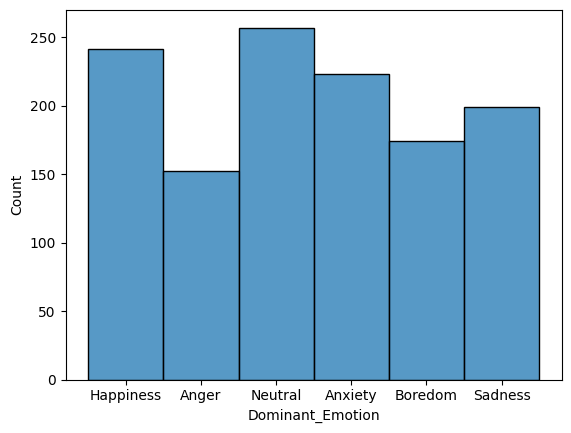

In [136]:
sns.histplot(data=df_smae["Dominant_Emotion"])

### What's the approximate relationship between a user's daily usage time of a platform and that user's number of daily posts on that platform?

<Axes: xlabel='Daily_Usage_Time (minutes)', ylabel='Posts_Per_Day'>

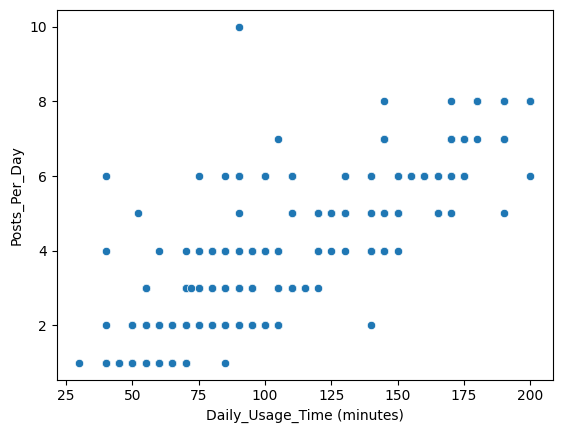

In [139]:
sns.scatterplot(data=df_smae, x="Daily_Usage_Time (minutes)", y="Posts_Per_Day")

### What's the approximate relationship between a user's daily usage time of a platform and that user's number of daily likes received on that platform?

<Axes: xlabel='Daily_Usage_Time (minutes)', ylabel='Likes_Received_Per_Day'>

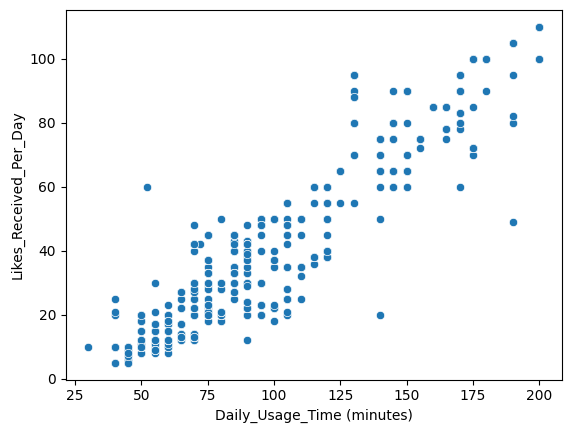

In [140]:
sns.scatterplot(data=df_smae, x="Daily_Usage_Time (minutes)", y="Likes_Received_Per_Day")

### What's the approximate relationship between a user's daily usage time of a platform and that user's number of daily comments received on that platform?

Text(0.5, 1.0, 'asdfasdf')

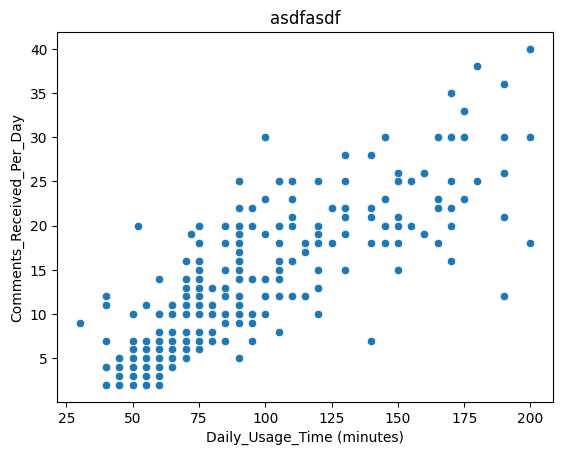

In [218]:
sns.scatterplot(data=df_smae, x="Daily_Usage_Time (minutes)", y="Comments_Received_Per_Day")
plt.title("asdfasdf")

### What's the approximate relationship between a user's daily usage time of a platform and that user's number of daily messages sent on that platform?

<Axes: xlabel='Daily_Usage_Time (minutes)', ylabel='Messages_Sent_Per_Day'>

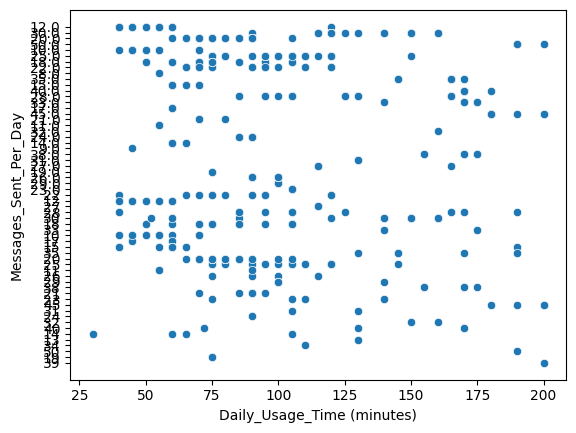

In [142]:
sns.scatterplot(data=df_smae, x="Daily_Usage_Time (minutes)", y="Messages_Sent_Per_Day")

In [143]:
df_smae["Messages_Sent_Per_Day"].unique()

array(['12.0', '30.0', '20.0', '50.0', '10.0', '25.0', '18.0', '22.0',
       '8.0', '35.0', '15.0', '40.0', '28.0', '33.0', '17.0', '45.0',
       '21.0', '11.0', '32.0', '24.0', '14.0', '9.0', '38.0', '31.0',
       '27.0', '19.0', '26.0', '29.0', '23.0', '22', '12', '27', '28',
       '30', '18', '33', '10', '17', '15', '35', '20', '25', '11', '26',
       '29', '38', '21', '23', '45', '31', '24', '32', '40', '14', '13',
       '34', '50', '19', '39'], dtype=object)

In [149]:
df_smae["Posts_Per_Day"] = df_smae["Posts_Per_Day"].astype(float).astype(int)
df_smae["Likes_Received_Per_Day"] = df_smae["Likes_Received_Per_Day"].astype(float).astype(int)
df_smae["Comments_Received_Per_Day"] = df_smae["Comments_Received_Per_Day"].astype(float).astype(int)
df_smae["Messages_Sent_Per_Day"] = df_smae["Messages_Sent_Per_Day"].astype(float).astype(int)

In [217]:
df_smae["Messages_Sent_Per_Day"].unique()

array([12, 30, 20, 50, 10, 25, 18, 22,  8, 35, 15, 40, 28, 33, 17, 45, 21,
       11, 32, 24, 14,  9, 38, 31, 27, 19, 26, 29, 23, 13, 34, 39])

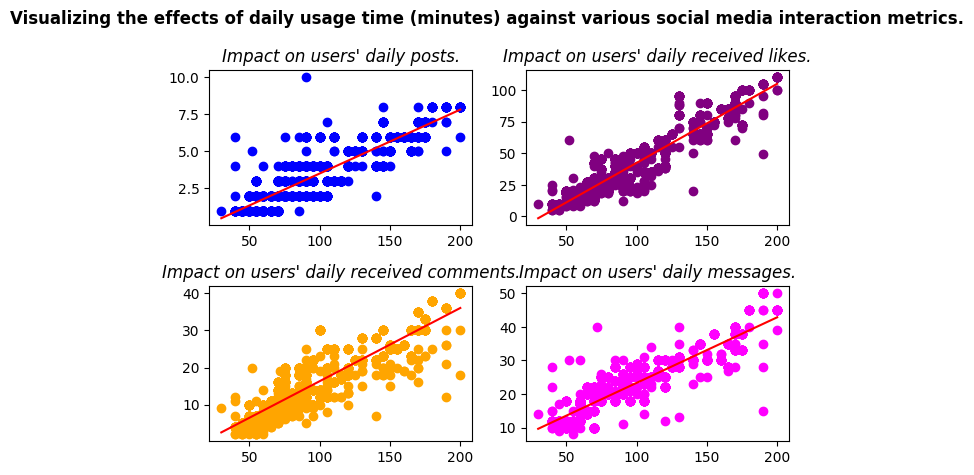

In [227]:
figure, axes = plt.subplots(2, 2)
figure.suptitle(
    "Visualizing the effects of daily usage time (minutes) against various social media interaction metrics.",
    fontweight="bold")

axes[0, 0].scatter(x=df_smae["Daily_Usage_Time (minutes)"], 
                   y=df_smae["Posts_Per_Day"], 
                   color="blue") 
axes[0, 0].plot(*np.polynomial.Polynomial.fit(df_smae["Daily_Usage_Time (minutes)"], 
                                              df_smae["Posts_Per_Day"], 
                                              1).linspace(), 'r-')
axes[0, 0].set_title("Impact on users' daily posts.", 
                     style="italic") 

axes[0, 1].scatter(x=df_smae["Daily_Usage_Time (minutes)"], 
                   y=df_smae["Likes_Received_Per_Day"], 
                   color="purple") 
axes[0, 1].plot(*np.polynomial.Polynomial.fit(df_smae["Daily_Usage_Time (minutes)"], 
                                              df_smae["Likes_Received_Per_Day"], 
                                              1).linspace(), 'r-')
axes[0, 1].set_title("Impact on users' daily received likes.",
                     style="italic") 

axes[1, 0].scatter(x=df_smae["Daily_Usage_Time (minutes)"], 
                   y=df_smae["Comments_Received_Per_Day"], 
                   color="orange") 
axes[1, 0].plot(*np.polynomial.Polynomial.fit(df_smae["Daily_Usage_Time (minutes)"], 
                                              df_smae["Comments_Received_Per_Day"], 
                                              1).linspace(), 'r-')
axes[1, 0].set_title("Impact on users' daily received comments.", 
                     style="italic") 

axes[1, 1].scatter(x=df_smae["Daily_Usage_Time (minutes)"], 
                   y=df_smae["Messages_Sent_Per_Day"], 
                   color="magenta") 
axes[1, 1].plot(*np.polynomial.Polynomial.fit(df_smae["Daily_Usage_Time (minutes)"], 
                                              df_smae["Messages_Sent_Per_Day"], 
                                              1).linspace(), 'r-')
axes[1, 1].set_title("Impact on users' daily messages.", 
                     style="italic") 

figure.tight_layout()